<a href="https://colab.research.google.com/github/shatakshidata/aiRecruitment/blob/main/NoAPI_SeventhSense_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openai

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
root_dir  = "/content/drive/MyDrive/JD7Sense/Examples"  # Replace with the folder ID of "s4 Example"
immediate_directories = [name for name in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, name))]

for dir in immediate_directories:
  # you can ignore this line as these folders got created in my drive
  if dir != ".ipynb_checkpoints":

    for file in os.listdir(f"{root_dir}/{dir}/{dir} Candidate Resume"):
      # you can ignore this line as these folders got created in my drive
      if file != ".ipynb_checkpoints":
        print(f"JD: {root_dir}/{dir}/{dir} Job description.url and Resume: {root_dir}/{dir}/{dir} Candidate Resume/{file}")

        root_dir  = "/content/drive/MyDrive/JD7Sense/Examples"  # Replace with the folder ID of "s4 Example"
immediate_directories = [name for name in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, name))]

for dir in immediate_directories:
  # you can ignore this line as these folders got created in my drive
  if dir != ".ipynb_checkpoints":

    for file in os.listdir(os.path.join(root_dir,dir, f"{dir} Candidate Resume")):
      # you can ignore this line as these folders got created in my drive
      if file != ".ipynb_checkpoints":
        print(f"JD: {root_dir}/{dir}/{dir} Job description.url and Resume: {root_dir}/{dir}/{dir} Candidate Resume/{file}")

In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 14.8 MB/s eta 0:00:00


In [ ]:
import os
import requests
import docx
import PyPDF2
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define helper functions
def extract_text_from_docx(docx_path):
    """Extract text from a .docx file."""
    doc = docx.Document(docx_path)
    return "\n".join([para.text for para in doc.paragraphs])

def extract_text_from_pdf(pdf_path):
    """Extract text from a .pdf file."""
    text = ""
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

def extract_text_from_url(url_path):
    """Extract text from a .url file."""
    with open(url_path, "r") as file:
        url = file.read().strip()
    response = requests.get(url)
    return response.text if response.status_code == 200 else "Failed to fetch JD from URL"

# Step 3: Process folders and pair JD with resumes
def process_folders(base_path):
    results = []

    # Traverse all folders within the base directory
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)

        if not os.path.isdir(folder_path):
            continue  # Skip files, only process directories

        jd_file = None
        resume_files = []

        # Traverse files within the current folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)

            if file.endswith(".url"):
                jd_file = file_path
            elif file.endswith(".docx") or file.endswith(".pdf"):
                resume_files.append(file_path)

        if jd_file and resume_files:
            # Extract JD text
            jd_text = extract_text_from_url(jd_file)

            # Process each resume in the folder
            for resume_file in resume_files:
                if resume_file.endswith(".docx"):
                    resume_text = extract_text_from_docx(resume_file)
                elif resume_file.endswith(".pdf"):
                    resume_text = extract_text_from_pdf(resume_file)
                else:
                    continue

                # Create JD-resume pair
                results.append({
                    "Folder": folder,
                    "JD_File": jd_file,
                    "JD_Text": jd_text,
                    "Resume_File": resume_file,
                    "Resume_Text": resume_text
                })
        else:
            print(f"Warning: Incomplete data in folder {folder}. Skipping...")

    return results

# Step 4: Define the base directory and run the function
base_directory = "/content/drive/My Drive/YourFolderName"
jd_resume_pairs = process_folders(base_directory)

# Step 5: Save results to a DataFrame and export to Excel
df_results = pd.DataFrame(jd_resume_pairs)
output_path = "/content/drive/My Drive/jd_resume_pairs.xlsx"
df_results.to_excel(output_path, index=False)
print(f"Results saved to {output_path}")


ModuleNotFoundError: No module named 'PyPDF2'

In [ ]:
!pip install openai python-docx PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 29.2 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI

In [ ]:


client = OpenAI(
  api_key='ADD_API_KEY'
)


In [ ]:
import time
time.sleep(1)

In [ ]:
completion = client.chat.completions.create(
    model = "gpt-4o-mini",
    messages=[
        {"role": "system",
         "content": "You are an expert recruiter."
         },
        {
            "role": "user",
            "content": "Help us with resume relevance score for every job description"
        }
    ]
)

In [ ]:
import fitz  # PyMuPDF library # Resume

def read_pdf(file_path):
    doc = fitz.open(file_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        text += page.get_text("text")
    return text

In [ ]:
job_description = read_pdf("/content/JD7sense.pdf")

In [ ]:
resume_1 = read_pdf("/content/4-ResumeNathanielBanks.pdf")
resume_2 = read_pdf("/content/73-Alonzo_Craig_Washington.pdf")
#resume_3 = read_pdf("/content/14-resume 2.pdf")
#resume_4 = read_pdf("/content/9-Medina_Brian_2024.docx")
#resume_5 = read_pdf("/content/26-Resume.pdf")

In [ ]:
prompt = f"""Given is 1 job description file {job_description} in response and 2 resume {resume_1}, {resume_2} files in response2.
Give me each of the 2 candidate's name and relevancy score by using their resume against the same job description.
It can be a number between 1 to 10. Please also explain breakdown of scoring. Please try to be concise"""

response3 = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system",
         "content": "You are a recruiter that provides relevance scores between job descriptions and resumes.t"},
        {"role": "user",
         "content": prompt}
    ],
    max_tokens= 3000,
    temperature= 0
)

In [ ]:
print(response3.choices[0].message.content)

### Candidate 1: Nathaniel Banks
**Relevancy Score: 8/10**

**Breakdown of Scoring:**
- **Experience in Configuration Management (CM):** Nathaniel has over 10 years of experience in aviation maintenance and production control, which aligns well with the job's requirement for at least three years in CM of aircraft systems. (Score: 3/3)
- **Education:** He has a Bachelor's degree in Business, which meets the educational requirement. (Score: 1/1)
- **Security Clearance:** He holds a Secret security clearance, which is a requirement for the position. (Score: 1/1)
- **Experience with DoD Acquisition Programs:** His experience with the U.S. Navy and various defense-related roles suggests familiarity with DoD policies and acquisition processes, although not explicitly stated. (Score: 1/2)
- **Communication Skills:** His roles indicate strong communication skills, but specific examples of customer service focus are less emphasized. (Score: 1/1)
- **Preferred Qualifications:** Lacks specific ex

In [ ]:
def get_relevance_scores(job_description, resumes):
    """Get relevance scores for resumes against a job description using OpenAI API."""
    # Construct the prompt using the job description and resume names
    resume_list = ', '.join(resumes)  # Join resume names for the prompt
    prompt = f"""Given is 1 job description file: {job_description}.
    You have the following resumes: {resume_list}.
    Please provide each candidate's name and their relevancy score based on the resume against the job description.
    The score should be a number between 0 to 1, with 2 decimal points.
    Please also provide a breakdown of the scoring. Be concise in your explanations.
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",  # Use the appropriate model version
        messages=[
            {
                "role": "system",
                "content": "You are a recruiter that provides relevance scores between job descriptions and resumes."
            },
            {
                "role": "user",
                "content": prompt
            }
        ],
        max_tokens=3000,
        temperature=0
    )

    # Assuming the response structure
    return response.choices[0].message.content


In [ ]:

job_description_file = job_description
resumes = [resume_1, resume_2, resume_3, resume_4, resume_5]  # List of resumes for this JD

# Call the function and get the scores
relevance_scores = get_relevance_scores(job_description_file, resumes)
print(relevance_scores)

Here are the relevancy scores for each candidate based on their resumes against the job description for the Configuration Management Analyst position:

### 1. Nathaniel Banks
**Relevancy Score: 0.85**

**Breakdown:**
- **Relevant Experience (0.4):** Over 10 years in aviation maintenance and production control, with specific experience in configuration management and logistics.
- **Education (0.2):** Completed DAU Fundamentals of Systems Acquisition Management Certification, which aligns with the job's educational requirements.
- **Security Clearance (0.1):** Holds a Secret security clearance, which is a requirement for the position.
- **Skills (0.15):** Proficient in Microsoft Office and has strong organizational and communication skills, which are essential for the role.
- **Specific Knowledge (0.1):** Familiarity with DoD policies and procedures, though not explicitly stated, is implied through military experience.

### 2. Alonzo Craig
**Relevancy Score: 0.78**

**Breakdown:**
- **Re

In [ ]:
JD2 = read_pdf("/content/Job Desription 2.pdf")

In [ ]:
resume_6 = read_pdf("/content/66-Resume_Jenell Washington_May 2024.docx")
resume_7 = read_pdf("/content/77-Amy_Rose.pdf")
resume_8 = read_pdf("/content/35-GINA_MOTEN RESUME  April 2024.pdf")
resume_9 = read_pdf("/content/72-Megan_Wilson_Resume.pdf")

In [ ]:
job_description_file = JD2
resumes = [resume_6, resume_7, resume_8, resume_9]  # List of resumes for this JD

# Call the function and get the scores
relevance_scores = get_relevance_scores(job_description_file, resumes)
print(relevance_scores)

### Candidate Relevancy Scores

1. **Jenell P. Washington**
   - **Relevancy Score:** **0.95**
   - **Breakdown:**
     - **Experience in Federal Government Contracts:** Extensive experience (23 years) in contracts and acquisitions, specifically with federal agencies, aligns well with the job's requirement for federal government contracting experience.
     - **Education:** Holds a Bachelor's Degree in Business Administration with a minor in Acquisition and Contract Management, meeting the educational requirement.
     - **Certifications:** FAC-C Level III Certification and an unlimited warrant, which are highly relevant to the procurement specialist role.
     - **Skills:** Proficient in procurement systems (PPS, SAM, FPDS), which are mentioned in the job description. Strong experience in IT procurement aligns with the specific focus of the position.
     - **Communication and Leadership:** Demonstrated ability to assist and train junior team members, which is a desired skill in the j

In [ ]:
JD3 = read_pdf("/content/JD3.pdf")

In [ ]:
resume_10 = read_pdf("/content/91-B.Burton Resume.pdf")
resume_11 = read_pdf("/content/37-Michael-Davis.pdf")
resume_12 = read_pdf("/content/66-Adel Program Manager Resume.pdf")
resume_13 = read_pdf("/content/51-Jasna_Bilalic.pdf")

In [ ]:
job_description_file = JD3
resumes = [resume_10, resume_11, resume_12, resume_13]  # List of resumes for this JD

# Call the function and get the scores
relevance_scores = get_relevance_scores(job_description_file, resumes)
print(relevance_scores)

Here are the relevancy scores for each candidate based on their resumes against the Program Manager job description:

### 1. Bernetta R. Burton
**Relevancy Score: 0.85**

**Breakdown:**
- **Education:** Holds a B.A. in Acquisition and Contract Management, which is relevant to the business-related discipline requirement (0.15).
- **Experience:** Over 20 years in contracts and acquisitions, including significant experience with DoD and R&D programs, which aligns well with the job's requirements (0.30).
- **Certifications:** PMP Certification and DAWIA Level II Certification, meeting the certification requirement (0.15).
- **Skills:** Extensive experience in contract management, risk management, and project management, which are crucial for the role (0.25).
- **Clearance:** Holds a Public Trust clearance, which is required (0.10).

### 2. Michael Davis
**Relevancy Score: 0.70**

**Breakdown:**
- **Education:** Holds a Bachelor's degree in Business Management, which is relevant (0.10).
- *

Using GEMINI API Key

In [ ]:
!pip install -q -U google-generativeai
import pathlib
import textwrap
import google.generativeai as genai


In [ ]:
genai.configure(api_key= "add_api_key")

In [ ]:
import pathlib
import textwrap
import google.generativeai as genai
from google.generativeai.types import generation_types

def calculate_relevance_score(resumes, jd_text):
    resume_list = ', '.join(resumes)
    """Calculates the relevance score of every resume against a job description.
    Args:
        resume_text: The text of the multiple resumes for that job description.
        jd_text: The text of the job description.
    Returns:
        A dictionary containing the relevance score, candidate's name and breakdown.
    """
    genai.configure(api_key="ADD_API_KEY")
    # Prompt to be sent to the model
    prompt = f"""Given is 1 job description file: {jd_text}\n
    You have the following resumes: {resume_list}\n
    For every resume, please provide candidates name and their relevancy score based on the resume against the job description.
    The score should be a number between 0 to 1, with 2 decimal points.
    Please also provide a breakdown of the scoring. Be concise in your explanations.
    """
    generation_config = generation_types.GenerationConfig(
    temperature=0,  # Adjust randomness (0.0-1.0)
    max_output_tokens=20000  # Limit output length
    )
    model = genai.GenerativeModel("gemini-1.5-flash")
    # Generate text from the prompt
    response = model.generate_content(
        contents=prompt,
        generation_config=generation_config
    )
    return response.text

In [ ]:
job_description = read_pdf("/content/JD7sense.pdf")
resume_1 = read_pdf("/content/4-ResumeNathanielBanks.pdf")
resume_2 = read_pdf("/content/73-Alonzo_Craig_Washington.pdf")

In [ ]:
jd_text = job_description
resumes = [resume_1, resume_2]  # List of resumes for this JD

# Call the function and get the scores
relevance_scores = calculate_relevance_score(resumes, jd_text)
print(relevance_scores)

## Candidate Relevancy Scores:

**1. Nathaniel Banks:**

* **Score:** 0.78
* **Breakdown:**
    * **Strong Match:** Extensive experience in Aviation Maintenance Administration, Production Control, and Configuration Management. Possesses relevant certifications (Forklift, Secret Clearance) and experience with NALCOMIS, OOMA, and other relevant systems. 
    * **Moderate Match:**  Experience in Project Management and familiarity with DoD acquisition processes (DAU ACQ 101). 
    * **Weak Match:**  Lack of direct experience with F-35 program or 5th Generation Fighter acquisition. 

**2. Alonzo Craig:**

* **Score:** 0.92
* **Breakdown:**
    * **Strong Match:** Extensive experience in Configuration Management, Release Management, and ServiceNow platform. Demonstrated expertise in CMDB, ITIL, Change Management, and Release Management processes. 
    * **Moderate Match:**  Experience in project management and working with stakeholders. 
    * **Weak Match:**  Limited direct experience with 

"## Candidate: Nathaniel Banks\n\n**Relevancy Score: 0.85**\n\n**Breakdown:**\n\n* **Strong Match:**\n    * **Configuration Management Experience:** Nathaniel has extensive experience in configuration management, particularly within the Navy's OOMA system. He has managed support equipment, performed audits, and implemented technical data into the system. This aligns directly with the job description's requirements.\n    * **Defense Acquisition Experience:** Nathaniel has worked on various defense programs, including the F/A-18E/F and P-3 Orion, demonstrating experience with DoD acquisition processes. He has also completed the DAU Fundamentals of Systems Acquisition Management Certification Course (ACQ 101).\n    * **Technical Skills:** Nathaniel possesses relevant technical skills like Microsoft Office, MRP, ERP, and system administration, which are essential for the role.\n    * **Clearance:** Nathaniel holds a Secret security clearance, meeting the job requirement.\n    * **Education

# Embedding

In [ ]:
pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.3 MB/s eta 0:00:00


In [ ]:
import tiktoken

# Function to calculate the number of tokens for a given text
def calculate_tokens(text, model="gpt-4"):
    # Load the tokenizer for the specified model
    tokenizer = tiktoken.encoding_for_model(model)

    # Encode the text using the tokenizer
    tokens = tokenizer.encode(text)

    # Return the number of tokens
    return len(tokens)


In [ ]:
jd_tokens = calculate_tokens(job_description)
resume_1_tokens = calculate_tokens(resume_1)
resume_2_tokens = calculate_tokens(resume_2)
resume_3_tokens = calculate_tokens(resume_3)
resume_4_tokens = calculate_tokens(resume_4)
resume_5_tokens = calculate_tokens(resume_5)

n = sum([jd_tokens, resume_1_tokens, resume_2_tokens, resume_3_tokens])
print(n)

Cost = 0.00002*n/1000
print(Cost)

6363
0.00012726000000000003


In [ ]:
def get_embedding(text, model="text-embedding-ada-002"):
    # Request embeddings from OpenAI
    response = client.embeddings.create(
        input=text,
        model=model
    )
    # Extract the embedding from the response
    embedding = response.data[0].embedding
    return embedding

# Get embeddings for job description and resumes
job_description_embedding = get_embedding(job_description)
resume_1_embedding = get_embedding(resume_1)
resume_2_embedding = get_embedding(resume_2)
resume_3_embedding = get_embedding(resume_3)
resume_4_embedding = get_embedding(resume_4)
resume_5_embedding = get_embedding(resume_5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Function to calculate cosine distance (1 - cosine similarity)
def cosine_distance(vec1, vec2):
    return 1 - cosine_similarity(vec1, vec2)

In [ ]:
# Calculate cosine distance between job description and each resume
distance_resume_1 = cosine_distance(job_description_embedding, resume_1_embedding)
distance_resume_2 = cosine_distance(job_description_embedding, resume_2_embedding)
distance_resume_3 = cosine_distance(job_description_embedding, resume_3_embedding)
distance_resume_4 = cosine_distance(job_description_embedding, resume_4_embedding)
distance_resume_5 = cosine_distance(job_description_embedding, resume_5_embedding)

# Print the distances
print(f"Cosine Distance between JD and Resume 1: {distance_resume_1}")
print(f"Cosine Distance between JD and Resume 2: {distance_resume_2}")
print(f"Cosine Distance between JD and Resume 3: {distance_resume_3}")
print(f"Cosine Distance between JD and Resume 4: {distance_resume_4}")
print(f"Cosine Distance between JD and Resume 5: {distance_resume_5}")

Cosine Distance between JD and Resume 1: 0.1888680905267296
Cosine Distance between JD and Resume 2: 0.18667237406458148
Cosine Distance between JD and Resume 3: 0.1853946035178229
Cosine Distance between JD and Resume 4: 0.18474220922376783
Cosine Distance between JD and Resume 5: 0.2696372129237119


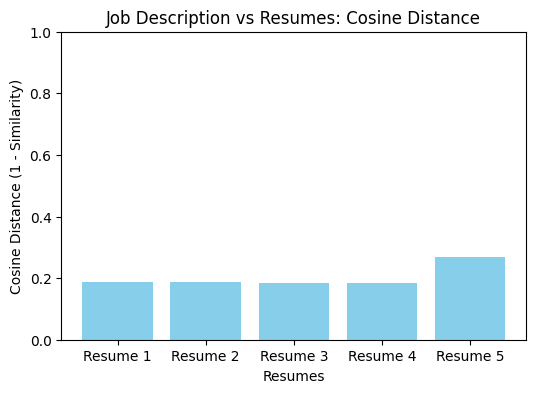

In [ ]:
distances = [distance_resume_1, distance_resume_2, distance_resume_3, distance_resume_4, distance_resume_5]
labels = ['Resume 1', 'Resume 2', 'Resume 3', 'Resume 4', 'Resume 5']

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(labels, distances, color='skyblue')
plt.xlabel('Resumes')
plt.ylabel('Cosine Distance (1 - Similarity)')
plt.title('Job Description vs Resumes: Cosine Distance')
plt.ylim([0, 1])  # Cosine distance ranges from 0 to 1
plt.show()

SBERT

In [ ]:
pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 12.9 MB/s eta 0:00:00


In [ ]:
pip install datasets

In [ ]:
import os
from sentence_transformers import SentenceTransformer, losses, InputExample
from torch.utils.data import DataLoader
from datasets import Dataset  # Import Dataset to resolve the error

# Set your Hugging Face token
os.environ['HUGGINGFACE_HUB_TOKEN'] = 'ADD_API_KEY'

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# 2. Calculate embeddings by calling model.encode()
embeddings_jd = model.encode(job_description)

### send embeddings to openai and see if you can tweak it  - find similar results with GPT and weightages acc to client

In [ ]:
embeddings_resume_1 = model.encode(resume_1)
embeddings_resume_2 = model.encode(resume_2)
embeddings_resume_3 = model.encode(resume_3)
embeddings_resume_4 = model.encode(resume_4)
embeddings_resume_5 = model.encode(resume_5)

# 3. Calculate the embedding similarities
similarities_1 = model.similarity(embeddings_jd, embeddings_resume_1)
similarities_2 = model.similarity(embeddings_jd, embeddings_resume_2)
similarities_3 = model.similarity(embeddings_jd, embeddings_resume_3)
similarities_4 = model.similarity(embeddings_jd, embeddings_resume_4)
similarities_5 = model.similarity(embeddings_jd, embeddings_resume_5)

print(similarities_1)
print(similarities_2)
print(similarities_3)
print(similarities_4)
print(similarities_5)

tensor([[0.5284]])
tensor([[0.3559]])
tensor([[0.4324]])
tensor([[0.5124]])
tensor([[0.2608]])


Tuning the weights for similarity #Section-Based Pairing

In [ ]:
# Weights as defined by the client
#weights = {'skills': 0.5, 'experience': 0.3, 'education': 0.2}

# Calculate weighted similarity
#final_score = (
    #weights['skills'] * cosine_similarity(jd_skills_emb, resume_skills_emb) +
    #weights['experience'] * cosine_similarity(jd_experience_emb, resume_experience_emb) +
    #weights['education'] * cosine_similarity(jd_education_emb, resume_education_emb)
#)

# Print the final score
#print("Final Similarity Score:", final_score)

Generating positive and negative pairs of JDs and Resumes

In [ ]:
JD1 = read_pdf("/content/JD7sense.pdf")
JD2 = read_pdf("/content/Job Desription 2.pdf")
resume_1 = read_pdf("/content/4-ResumeNathanielBanks.pdf")
resume_2 = read_pdf("/content/73-Alonzo_Craig_Washington.pdf")
resume_3 = read_pdf("/content/14-resume 2.pdf")
resume_4 = read_pdf("/content/76-MJonesResume2024.pdf")
resume_5 = read_pdf("/content/26-Resume.pdf")

In [ ]:
resume_6 = read_pdf("/content/66-Resume_Jenell Washington_May 2024.docx")
resume_7 = read_pdf("/content/77-Amy_Rose.pdf")
resume_8 = read_pdf("/content/35-GINA_MOTEN RESUME  April 2024.pdf")
resume_9 = read_pdf("/content/72-Megan_Wilson_Resume.pdf")

In [ ]:
from sentence_transformers import SentenceTransformer, InputExample


# Example dataset
jobs = {
    "JD1": "JD1",
    "JD2": "JD2"
    # Add more job descriptions
}

# Resumes associated with each JD, where each tuple is (resume_text, label)
resumes = {
    "JD1": [
        ("resume_1", 1),
        ("resume_2", 0),
        ("resume_3", 0)
        # Add more resumes
    ],
    "JD2": [
        ("resume_6", 1),
        ("resume_7", 0),
        ("resume_8", 0)
        # Add more resumes
    ]
}

# Function to create pairs
def create_pairs(jobs, resumes):
    pairs = []
    for jd_id, job_description in jobs.items():
        # Get the resumes associated with this job description
        associated_resumes = resumes.get(jd_id, [])

        for resume_text, label in associated_resumes:
            # Create an InputExample for each JD-resume pair
            pair = InputExample(texts=[job_description, resume_text], label=float(label))
            pairs.append(pair)

    return pairs

In [ ]:
 # Generate the pairs
dataset_pairs = create_pairs(jobs, resumes)

# Check the first few pairs
for pair in dataset_pairs[:6]:
    print(f"Texts: {pair.texts}, Label: {pair.label}")

Texts: ['JD1', 'resume_1'], Label: 1.0
Texts: ['JD1', 'resume_2'], Label: 0.0
Texts: ['JD1', 'resume_3'], Label: 0.0
Texts: ['JD2', 'resume_6'], Label: 1.0
Texts: ['JD2', 'resume_7'], Label: 0.0
Texts: ['JD2', 'resume_8'], Label: 0.0


In [ ]:
print(dataset_pairs)

[<sentence_transformers.readers.InputExample.InputExample object at 0x7aee5bf0b8b0>, <sentence_transformers.readers.InputExample.InputExample object at 0x7aee5bf08100>, <sentence_transformers.readers.InputExample.InputExample object at 0x7aee5bf09bd0>, <sentence_transformers.readers.InputExample.InputExample object at 0x7aee5bf0a6b0>, <sentence_transformers.readers.InputExample.InputExample object at 0x7aee5bf0aa70>, <sentence_transformers.readers.InputExample.InputExample object at 0x7aee5bf0bdf0>]


In [ ]:
!pip install datasets transformers

In [ ]:
from sentence_transformers import SentenceTransformer, losses, InputExample
from torch.utils.data import DataLoader
from datasets import Dataset, DatasetDict

# Load the pre-trained SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert your dataset_pairs to InputExample format
train_examples = [InputExample(texts=[pair.texts[0], pair.texts[1]], label=pair.label) for pair in dataset_pairs]

# Create DataLoader from the training examples
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=2)

# Define the loss function (CosineSimilarityLoss)
train_loss = losses.CosineSimilarityLoss(model)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=3,         # The model will go through the entire dataset 3 times
    warmup_steps=100  # For the first 100 steps, the learning rate will gradually increase
)

NameError: name 'Dataset' is not defined